In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 26 18:27:50 2019

@author: chabhaidri
"""

'\nCreated on Sat Oct 26 18:27:50 2019\n\n@author: chabhaidri\n'

In [38]:
from sklearn import *
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [39]:
#1. Implémentez l’algorithme K-Means sous Python
#2. Initialisez les centroides avec la méthode de K-Means++.
#3. Initialisez les centroides
def kmeans(data,k_cluster):
    """data:Set of vectors
       k_cluster: Number of clusters
    """ 
    data_l = data.shape[0] 
    data_c = data.shape[1]
    itération=100
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    
    """Pick K random points as cluster centers""" 
    #centers = np.random.randn(k_cluster,data_c)*std + mean
    """Initialisez les centro ̈ıdes (prototypes) avec la m ́ethode de K Means++"""
    Kfit = KMeans(n_clusters=k_cluster, random_state=0 , init='k-means++').fit(data)
    centers = np.array(Kfit.cluster_centers_)
    
    """ store old centers """
    centers_old = np.zeros(centers.shape) 
    """ store new centers """
    centers_new = deepcopy(centers) 
    data.shape
    clusters = np.zeros(data_l)
    distances = np.zeros((data_l,k_cluster))
    condition_stop = np.linalg.norm(centers_new - centers_old)
    
    """ start the clustering loop, which will only end  when our clusters stop changing""" 
    while condition_stop != 0:
    
        for i in range(k_cluster):
            
            """Measure the distance between all the points of data and every center"""
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
            
        """Assign all training data to closest center"""
        clusters = np.argmin(distances, axis = 1)
        centers_old = deepcopy(centers_new)
        
        """Calculate mean for every cluster and update the center"""
        for i in range(k_cluster):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
            condition_stop = np.linalg.norm(centers_new - centers_old)
                
    return centers_new

In [40]:
"""randomly generate data"""
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

"""Generate random data and center it to the three centers"""
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

visialization of k-means


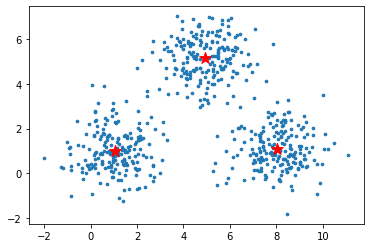

In [41]:
#5.Visualisez les clusters de données et leurs centroides.
"""Plot the data and the centers generated"""
print("visialization of k-means")
centers_new =kmeans(data,3)
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)

In [42]:
"""définitoin of silhouette fonction"""
def Silhouette(data,clusters): 
  """calculate the Silhouette score of a matrix 
  data: matrix or data used to the the culstring
  clusters: a matrix to map the data to labels
  """
  return metrics.silhouette_score(data, clusters, metric='euclidean')   
   


In [43]:
def protocole(k_cluster,nb_iteration):
  """ To calculate the quality of the model using Silhouette
  k:number of culster 
  nb_iteration:iteration number of k-means application 
  """
  for i in range(nb_iteration):
    new_cluster=kmeans(data,k_cluster)
    b=Silhouette(data,new_cluster)
    print(b)

In [45]:
range_n_clusters = [3]

For n_clusters = 3 The average silhouette_score is : 0.5933477102522363


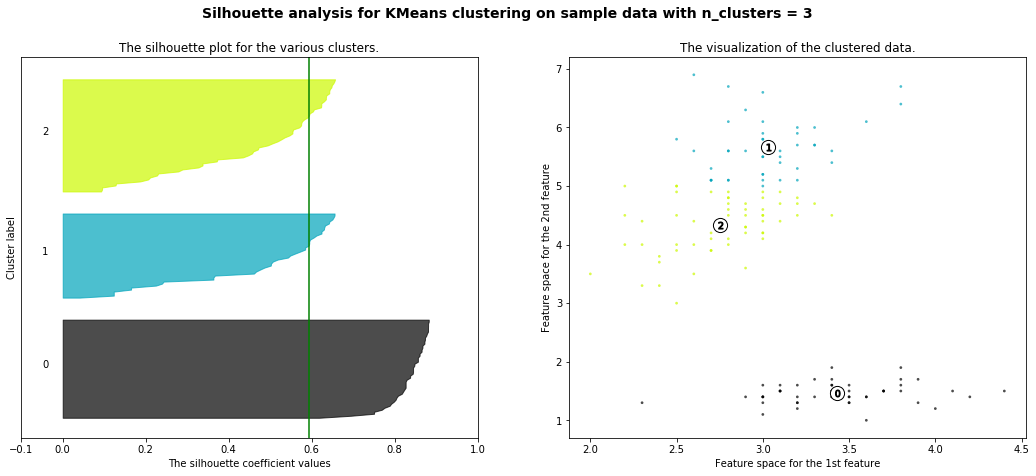

In [46]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="green", linestyle="-")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()